In [99]:
import tensorflow
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout,Input,Flatten,Dense,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [100]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import cv2
import matplotlib.pyplot as plt

In [101]:
from keras.preprocessing.image import ImageDataGenerator

# Building CNN Model:

In [102]:
tensorflow.test.is_gpu_available()

True

In [103]:
tensorflow.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [104]:
labels = os.listdir("../input/drowsiness-dataset/train")

In [105]:
labels

['Closed', 'Open', 'yawn', 'no_yawn']

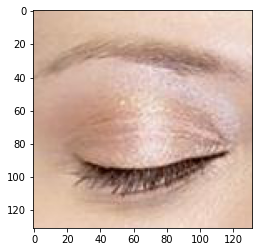

In [106]:
plt.imshow(plt.imread("../input/drowsiness-dataset/train/Closed/_2.jpg"))

In [107]:
a = plt.imread("../input/drowsiness-dataset/train/yawn/10.jpg")

In [108]:
a

array([[[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 65,  60,  54],
        [ 65,  60,  54],
        [ 65,  60,  54],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [157, 165, 178],
        [156, 164, 177],
        [156, 164, 177]],

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [155, 163, 176],
        [155, 163, 176],
        [155, 163, 176]],

       [[ 22,  25,  34],
        [ 22,  25,  34],
        [ 23,  26,  35],
        ...,
        [154, 162, 175],
        [154, 162, 175],
        [155, 163, 176]]

In [109]:
a.shape

(480, 640, 3)

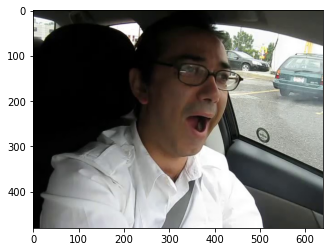

In [110]:
plt.imshow(plt.imread("../input/drowsiness-dataset/train/yawn/120.jpg"))

In [111]:
train_data_gen = ImageDataGenerator(rescale=1./255, validation_split= 0.2)

In [112]:
train_data = train_data_gen.flow_from_directory("../input/drowsiness-dataset/train", target_size=(80,80), batch_size=8, class_mode='categorical', subset='training')

Found 2321 images belonging to 4 classes.


In [113]:
validation_data = train_data_gen.flow_from_directory("../input/drowsiness-dataset/train", target_size=(80,80), batch_size=8, class_mode='categorical', subset= 'validation')

Found 579 images belonging to 4 classes.


In [114]:
test_data_gen = ImageDataGenerator(rescale=1./255)

In [115]:
test_data = test_data_gen.flow_from_directory("../input/drowsiness-dataset/train",
                                target_size=(80,80),batch_size=8,class_mode='categorical')

Found 2900 images belonging to 4 classes.


In [116]:
train_data

In [117]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

In [118]:
model = Sequential()

model.add(Conv2D(256, (3, 3), activation="relu",input_shape=(80,80,3)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(64, activation="relu"))
model.add(Dense(4, activation="softmax"))

model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [119]:
model.build(input_shape=(80, 80, 3))

In [120]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 78, 78, 256)       7168      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 39, 39, 256)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 128)       295040    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        73792     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 6, 6, 32)         

In [121]:
validation_steps = len(test_data)
validation_steps

363

In [122]:
hist = model.fit(train_data, epochs=55, validation_data = test_data, shuffle=True, validation_steps = len(test_data))

Epoch 1/55
291/291 [==============================] - 25s 83ms/step - loss: 0.7865 - accuracy: 0.6161 - val_loss: 0.4299 - val_accuracy: 0.7697
Epoch 2/55
291/291 [==============================] - 24s 84ms/step - loss: 0.4823 - accuracy: 0.7626 - val_loss: 0.4013 - val_accuracy: 0.7697
Epoch 3/55
291/291 [==============================] - 25s 84ms/step - loss: 0.3817 - accuracy: 0.8104 - val_loss: 0.3290 - val_accuracy: 0.8297
Epoch 4/55
291/291 [==============================] - 25s 86ms/step - loss: 0.3408 - accuracy: 0.8328 - val_loss: 0.3207 - val_accuracy: 0.8462
Epoch 5/55
291/291 [==============================] - 24s 82ms/step - loss: 0.3213 - accuracy: 0.8496 - val_loss: 0.3342 - val_accuracy: 0.8390
Epoch 6/55
291/291 [==============================] - 24s 84ms/step - loss: 0.2632 - accuracy: 0.8819 - val_loss: 0.2364 - val_accuracy: 0.8979
Epoch 7/55
291/291 [==============================] - 24s 84ms/step - loss: 0.2366 - accuracy: 0.8931 - val_loss: 0.2718 - val_accuracy:

In [123]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))

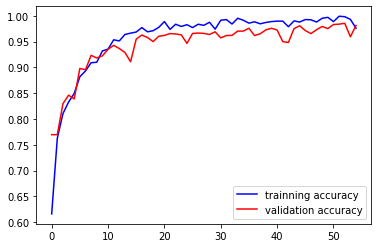

In [124]:
plt.plot(epochs, accuracy, "b", label="trainning accuracy")
plt.plot(epochs, val_accuracy, "r", label="validation accuracy")
plt.legend()
plt.show()

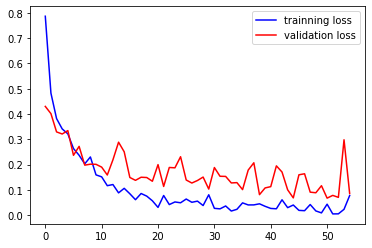

In [125]:
plt.plot(epochs, loss, "b", label="trainning loss")
plt.plot(epochs, val_loss, "r", label="validation loss")
plt.legend()
plt.show()

In [126]:
model.save("drowiness1.h5")

In [127]:
from tensorflow.keras.models import load_model

model = load_model('drowiness1.h5')


In [128]:
#import numpy as np

#y_probabilities = model.predict(test_data )
#y_pred = np.argmax(y_probabilities, axis=1)

In [129]:
#y_probabilities 

In [130]:
y_pred 

array([[9.8479825e-14, 2.9677001e-09, 6.2631792e-05, 9.9993742e-01],
       [9.8354465e-01, 1.6160138e-02, 1.1456090e-04, 1.8070839e-04],
       [2.4815840e-08, 1.3862505e-08, 9.1210246e-01, 8.7897569e-02],
       ...,
       [1.9344682e-06, 9.9998915e-01, 3.1742039e-07, 8.6145710e-06],
       [1.7518059e-05, 9.9992931e-01, 2.8712182e-05, 2.4457160e-05],
       [2.2662090e-05, 2.6341260e-07, 6.1965621e-01, 3.8032088e-01]],
      dtype=float32)

In [131]:
labels_new = ["Closed", "Open"]

In [132]:

# from tensorflow.keras.models import load_model

# model = load_model('drowiness1.h5')

# # Make predictions on the test data
# y_pred = model.predict(test_data)

# # Convert predictions to class labels
# y_pred_classes = np.argmax(y_pred, axis=1)

# # Get true class labels
# y_true = test_data.classes

# # Calculate accuracy
# accuracy = accuracy_score(y_true, y_pred_classes)
# print("Accuracy:", accuracy)

# # Calculate F1 score
# f1 = f1_score(y_true, y_pred_classes, average='weighted')
# print("F1 Score:", f1)

# # Generate the confusion matrix
# conf_matrix = confusion_matrix(y_true, y_pred_classes)

# # Display the confusion matrix
# print("Confusion Matrix:")
# print(conf_matrix)


Accuracy: 0.2596551724137931
F1 Score: 0.2595917529798253
Confusion Matrix:
[[186 179 195 166]
 [201 177 161 187]
 [170 183 204 168]
 [177 179 181 186]]


Evaluation Results:
Accuracy: 0.25275862068965516
Precision: 0.2527561034453811
Recall: 0.25275862068965516
F1-Score: 0.2527380141223143
ROC-AUC: 0.5083443691494209
True Positives: 180
True Negatives: 184
False Positives: 182
False Negatives: 200


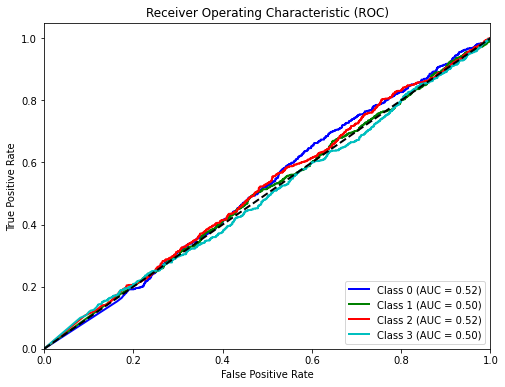

In [133]:
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from tensorflow.keras.models import load_model
num_classes = 4  
# Load your trained model
model = load_model('drowiness1.h5')

# Make predictions on the test data
y_pred = model.predict(test_data)

# Convert true class labels to one-hot encoding (required for precision, recall, and F1-score)
y_true = tf.keras.utils.to_categorical(test_data.classes, num_classes=num_classes)

# Calculate accuracy
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_true, axis=1)
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Calculate precision, recall, and F1-score
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

# Calculate ROC-AUC score (if your model outputs probabilities)
roc_auc = roc_auc_score(y_true, y_pred, average='weighted', multi_class='ovr')

# Calculate confusion matrix
#conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
#tn, fp, fn, tp = conf_matrix.ravel()

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Extract individual values from the confusion matrix
tn = conf_matrix[0, 0]
fp = conf_matrix[0, 1]
fn = conf_matrix[1, 0]
tp = conf_matrix[1, 1]

# Create a dictionary to store the results
evaluation_results = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "ROC-AUC": roc_auc,
    "True Positives": tp,
    "True Negatives": tn,
    "False Positives": fp,
    "False Negatives": fn,
}

# Print the evaluation results
print("Evaluation Results:")
for metric, value in evaluation_results.items():
    print(f"{metric}: {value}")


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Assuming y_true is one-hot encoded
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r', 'c']  # You can add more colors if you have more classes

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [134]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
# from tensorflow.keras.models import load_model
# model = load_model('drowiness1.h5')

# # Make predictions on the test data
# y_pred = model.predict(test_data)

# # Convert predictions to class labels
# y_pred_classes = np.argmax(y_pred, axis=1)

# # Get true class labels
# y_true = test_data.classes


# # Calculate accuracy
# accuracy = accuracy_score(y_true, y_pred_classes)

# # Calculate precision, recall, and F1-score
# precision = precision_score(y_true, y_pred_classes, average='weighted')
# recall = recall_score(y_true, y_pred_classes,  average='weighted')
# f1 = f1_score(y_true, y_pred_classes,  average='weighted')

# # Calculate ROC-AUC score (if your model outputs probabilities)

# roc_auc = roc_auc_score(y_true, y_pred_classes, average='weighted', multi_class='ovr')


# # Calculate confusion matrix
# conf_matrix = confusion_matrix(y_true, y_pred_classes)
# tn, fp, fn, tp = conf_matrix.ravel()

# # Create a dictionary to store the results
# evaluation_results = {
#         "Accuracy": accuracy,
#         "Precision": precision,
#         "Recall": recall,
#         "F1-Score": f1,
#         "ROC-AUC": roc_auc,
#         "True Positives": tp,
#         "True Negatives": tn,
#         "False Positives": fp,
#         "False Negatives": fn,
#     }
    

   
# evaluation_results = evaluate_model(model, y_true, y_pred_classes)
# print("Evaluation Results:")
# for metric, value in evaluation_results.items():
#     print(f"{metric}: {value}")


In [135]:

#from sklearn.metrics import classification_report
#print(classification_report(np.argmax(test_, axis=1), y_pred, target_names=labels_new))



In [136]:
#labels_new = ["Closed", "Open"]
#IMG_SIZE = 145
#def prepare(filepath, face_cas="../input/prediction-images/haarcascade_frontalface_default.xml"):
    #img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    #img_array = img_array / 255
    #resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    #return resized_array.reshape(-1, IMG_SIZE, IMG_SIZE, 3)

#model = tf.keras.models.load_model("./drowiness_new1.h5")

In [137]:
#0-yawn, 1-no_yawn, 2-Closed, 3-Open
#y_pred= model.predict([prepare("../input/drowsiness-dataset/train/no_yawn/1067.jpg")])
#np.argmax(y_pred)

In [138]:
#y_pred = model.predict([prepare("../input/drowsiness-dataset/train/Closed/_101.jpg")])
#np.argmax(y_pred)

In [139]:
#y_pred= model.predict([prepare("../input/drowsiness-dataset/train/Open/_104.jpg")])
#np.argmax(y_pred)

In [140]:
#y_pred = model.predict([prepare("../input/drowsiness-dataset/train/yawn/113.jpg")])
#np.argmax(y_pred)

In [141]:

# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
# X[]= train_data
# y[]= test_data
# def evaluate_model(model, X,y ):
#     # Make predictions using the model
#     y_pred = model.predict(X)

#     # Calculate accuracy
#     accuracy = accuracy_score(y, y_pred)

#     # Calculate precision, recall, and F1-score
#     precision = precision_score(y, y_pred)
#     recall = recall_score(y, y_pred)
#     f1 = f1_score(y, y_pred)

#     # Calculate ROC-AUC score (if your model outputs probabilities)
#     if hasattr(model, "predict_proba"):
#         y_prob = model.predict_proba(X)[:, 1]  # Assuming binary classification
#         roc_auc = roc_auc_score(y, y_probabilities)
#     else:
#         roc_auc = None

#     # Calculate confusion matrix
#     conf_matrix = confusion_matrix(y, y_pred)
#     tn, fp, fn, tp = conf_matrix.ravel()

#     # Create a dictionary to store the results
#     evaluation_results = {
#         "Accuracy": accuracy,
#         "Precision": precision,
#         "Recall": recall,
#         "F1-Score": f1,
#         "ROC-AUC": roc_auc,
#         "True Positives": tp,
#         "True Negatives": tn,
#         "False Positives": fp,
#         "False Negatives": fn,
#     }
    

#     return evaluation_results
# evaluation_results = evaluate_model(model, X, y)
# print("Evaluation Results:")
# for metric, value in evaluation_results.items():
#     print(f"{metric}: {value}")


In [142]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# # Assuming you have predictions and true labels for each dataset
# # Replace 'y_train_pred', 'y_train_true', 'y_test_pred', 'y_test_true', 'y_val_pred', 'y_val_true' with your actual variables

# # Training dataset metrics
# train_accuracy = accuracy_score(y_train_true, y_train_pred)
# train_precision = precision_score(y_train_true, y_train_pred)
# train_recall = recall_score(y_train_true, y_train_pred)
# train_f1 = f1_score(y_train_true, y_train_pred)
# train_confusion_matrix = confusion_matrix(y_train_true, y_train_pred)

# # Testing dataset metrics
# test_accuracy = accuracy_score(y_test_true, y_test_pred)
# test_precision = precision_score(y_test_true, y_test_pred)
# test_recall = recall_score(y_test_true, y_test_pred)
# test_f1 = f1_score(y_test_true, y_test_pred)
# test_confusion_matrix = confusion_matrix(y_test_true, y_test_pred)

# # Validation dataset metrics
# val_accuracy = accuracy_score(y_val_true, y_val_pred)
# val_precision = precision_score(y_val_true, y_val_pred)
# val_recall = recall_score(y_val_true, y_val_pred)
# val_f1 = f1_score(y_val_true, y_val_pred)
# val_confusion_matrix = confusion_matrix(y_val_true, y_val_pred)

# # Print or display the metrics for each dataset
# print("Training Metrics:")
# print(f"Accuracy: {train_accuracy}")
# print(f"Precision: {train_precision}")
# print(f"Recall: {train_recall}")
# print(f"F1-Score: {train_f1}")
# print("Confusion Matrix:")
# print(train_confusion_matrix)

# print("\nTesting Metrics:")
# print(f"Accuracy: {test_accuracy}")
# print(f"Precision: {test_precision}")
# print(f"Recall: {test_recall}")
# print(f"F1-Score: {test_f1}")
# print("Confusion Matrix:")
# print(test_confusion_matrix)

# print("\nValidation Metrics:")
# print(f"Accuracy: {val_accuracy}")
# print(f"Precision: {val_precision}")
# print(f"Recall: {val_recall}")
# print(f"F1-Score: {val_f1}")
# print("Confusion Matrix:")
# print(val_confusion_matrix)
